In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

# Features (pixel data) and labels (target)
X = digits.data  # Pixel values, 64 features per image (8x8)
y = digits.target  # Digit labels (0-9)

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
X.shape, y.shape

((1797, 64), (1797,))

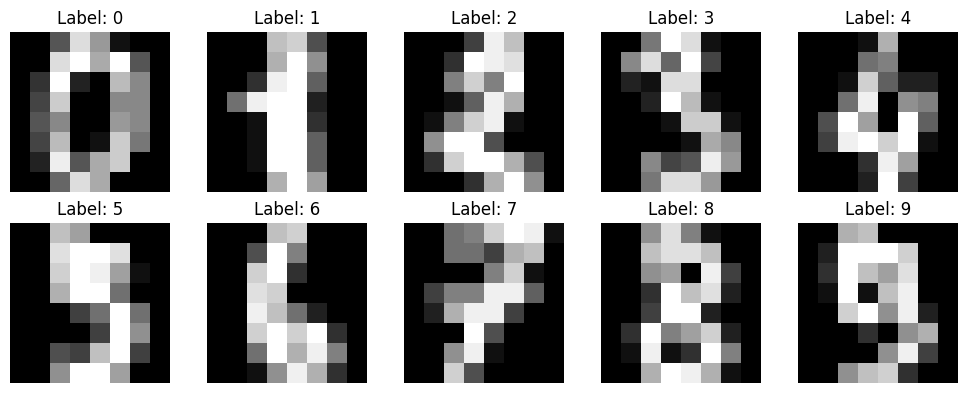

In [6]:
# Plot a few images with their labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



C:\Users\indira gothi\AppData\Local\Temp\ipykernel_13428\535010833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


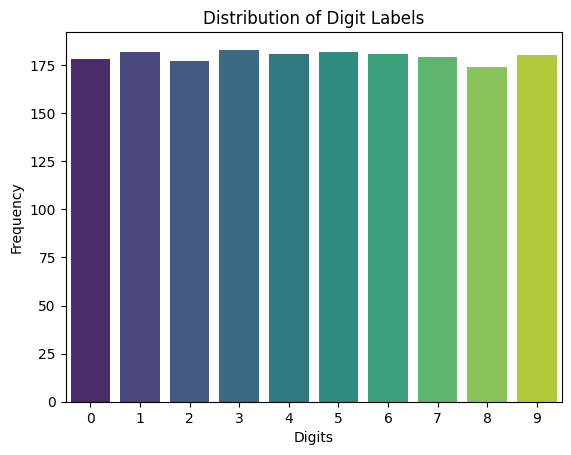

In [7]:
# Distribution of Target Labels
sns.countplot(x=y, palette='viridis')
plt.title("Distribution of Digit Labels")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()


### Split Data into Train and Test Sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1437, 64), (360, 64), (1437,), (360,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale features

X_test_scaled = scaler.transform(X_test)

In [11]:
# Train the SVM Model
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma=0.01, C=10)  # Gamma and C are hyperparameters
model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01)

In [12]:
y_pred = model.predict(X_test_scaled)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix : ", conf_matrix)

Accuracy: 98.33%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      1.00      0.97        36
           8       1.00      0.94      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

confusion matrix :  [[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  

In [14]:
from joblib import dump

# Save the model using joblib
dump(model, 'svm_digit_recog_model.pkl')

['svm_digit_recog_model.pkl']

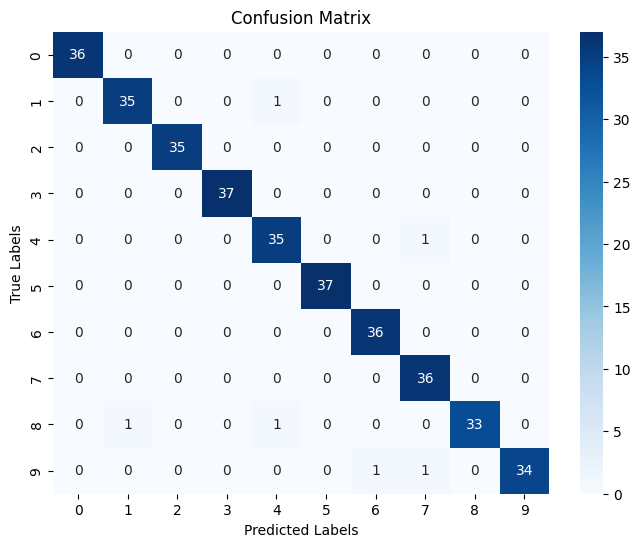

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Pick a test image from the scaled test set

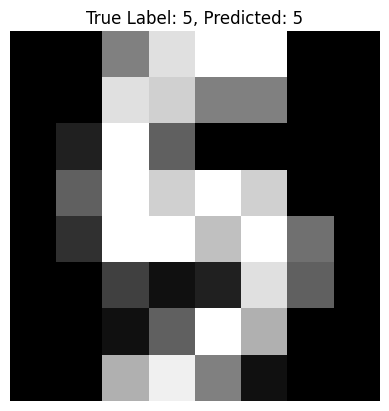

In [16]:
 
sample_index = 11 # Index of the sample you want to test
sample_image = X_test_scaled[sample_index].reshape(1, -1)  # Reshape to 2D for prediction
sample_label = y_test[sample_index]  # True label of the sample

# Predict the digit using the trained SVM model
predicted_label = model.predict(sample_image)

# Visualize the image and show the prediction
# For visualization, use the original (unscaled) test data to get the image back
plt.imshow(X_test[sample_index].reshape(8, 8), cmap='gray')  # Original pixel values
plt.title(f"True Label: {sample_label}, Predicted: {predicted_label[0]}")
plt.axis('off')
plt.show()
